In [5]:
from HaloUtils import DarkMatter,Galaxies,grylls19, Volume
from SizeUtils import K13Model, Concentrationmodel
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=55
plt.rcParams['figure.figsize']=(12,16)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
model_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_2 = dict(gamma10=0.5, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 
model_3 = dict(gamma10=0.65, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_4 = dict(gamma10=0.65, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 
var_gamma_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0.1,M11=0,SHMnorm11=0) 


(0, 2)

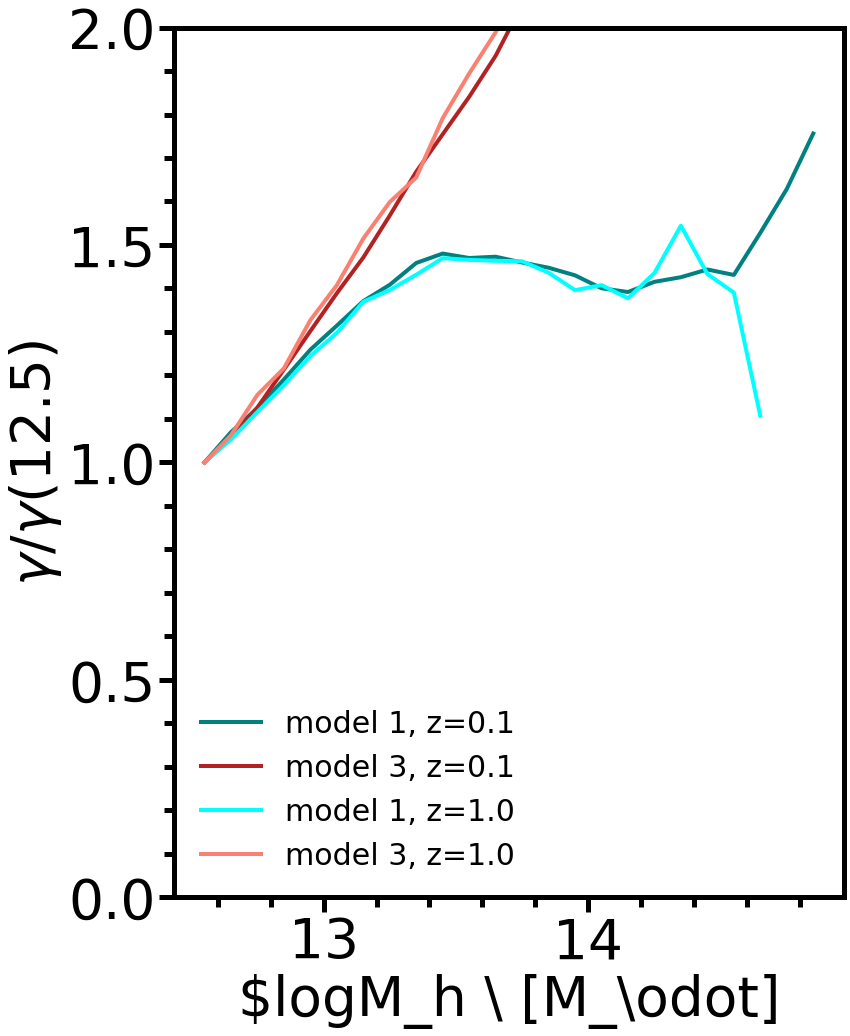

In [20]:
z = 0.1
models = [model_1,model_2,model_3,model_4]
dictionary_models = {'model 1':model_1, 'model 3':model_3}#,'model 3':model_3,'model 4':model_4}

colours = ['teal','firebrick']
ac = [0.0148,0.0122] # if gamma=0.4
ac = [0.0156,0.0129] # if gamma=0.2
ak = [0.0165, 0.0136]
for col, (lab, model) in zip(colours,dictionary_models.items()):
    galaxies = Galaxies(z=z,dict_SMHM=model)
    df = galaxies.catalog
    df = df.query('11.3<Mstar<12.1')
    if lab=='model 1':
        A_c = ac[0]
        A_K =ak[0]
    if lab=='model 3':
        A_c = ac[1]
        A_K =ak[1]
    
    sizeModel = K13Model(rhalo=df['Rh'], A_K=A_K, sigma_K=0.1 )
    Re = sizeModel.to_galaxy_size()
    halobins, mean, scatter  = sizeModel.get_environmental_dependence(Re, df['Mstar'], df['Mpeak'])
    plt.plot(halobins, mean/mean[0], color=col, lw=4, ls='-', label=lab+', z='+str(z))
    
    #sizeModel = Concentrationmodel(rhalo=df['Rh'],halos = df['Mpeak'],z=0.1, A_c=A_c, sigma_c=0,gamma=0.2 )
    #Re = sizeModel.to_galaxy_size()
    #halobins, mean, scatter  = sizeModel.get_environmental_dependence(Re, df['Mstar'], df['Mpeak'])
    #plt.plot(halobins, mean/mean[0], color=col, lw=4, ls=':', label=lab+' conc')   
    
colours = ['cyan','salmon']
z=1.
ac = [0.0148,0.0122] # if gamma=0.4
ac = [0.0156,0.0129] # if gamma=0.2
ak = [0.0165, 0.0136]
for col, (lab, model) in zip(colours,dictionary_models.items()):
    galaxies = Galaxies(z=z,dict_SMHM=model)
    df = galaxies.catalog
    df = df.query('11.3<Mstar<12.1')
    if lab=='model 1':
        A_c = ac[0]
        A_K =ak[0]
    if lab=='model 3':
        A_c = ac[1]
        A_K =ak[1]
    
    sizeModel = K13Model(rhalo=df['Rh'], A_K=A_K, sigma_K=0.1 )
    Re = sizeModel.to_galaxy_size()
    halobins, mean, scatter  = sizeModel.get_environmental_dependence(Re, df['Mstar'], df['Mpeak'])
    plt.plot(halobins, mean/mean[0], color=col, lw=4, ls='-', label=lab+', z='+str(z))
    
    #sizeModel = Concentrationmodel(rhalo=df['Rh'],halos = df['Mpeak'],z=0.1, A_c=A_c, sigma_c=0,gamma=0.2 )
    #Re = sizeModel.to_galaxy_size()
    #halobins, mean, scatter  = sizeModel.get_environmental_dependence(Re, df['Mstar'], df['Mpeak'])
    #plt.plot(halobins, mean/mean[0], color=col, lw=4, ls=':', label=lab+' conc')   
    
plt.ylabel('$\gamma/\gamma(12.5)$')
plt.xlabel('$logM_h \ [M_\odot]')
    
plt.legend(fontsize=30, frameon=False)

plt.ylim(0,2)
    

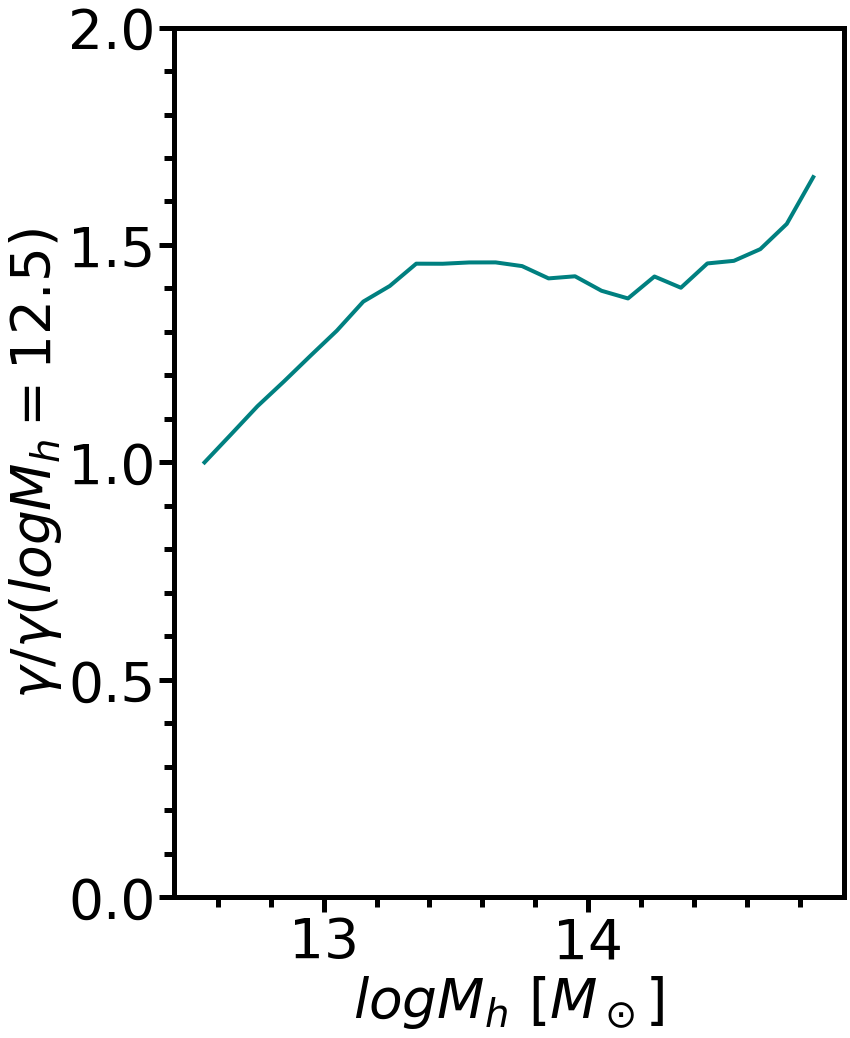

In [32]:
z = 0.1
models = [model_1,model_2,model_3,model_4]
dictionary_models = {'model 1':model_1}#, 'model 3':model_3}#,'model 3':model_3,'model 4':model_4}

colours = ['teal','firebrick']
ac = [0.0148,0.0122] # if gamma=0.4
ac = [0.0156,0.0129] # if gamma=0.2
ak = [0.0165, 0.0136]
for col, (lab, model) in zip(colours,dictionary_models.items()):
    galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict={'M0':1.5,'mu':2.5})
    df = galaxies.catalog
    df = df.query('11.3<Mstar<12.1')
    if lab=='model 1':
        A_c = ac[0]
        A_K =ak[0]
    if lab=='model 3':
        A_c = ac[1]
        A_K =ak[1]
    
    ETGs = df.query("TType=='ETGs'")
    sizeModel = K13Model(rhalo=ETGs['Rh'], A_K=A_K, sigma_K=0.1 )
    Re = sizeModel.to_galaxy_size()
    halobins, mean, scatter  = sizeModel.get_environmental_dependence(Re, ETGs['Mstar'], ETGs['Mpeak'])
    plt.plot(halobins, mean/mean[0], color=col, lw=4, ls='-')#, label=lab+', z='+str(z))
    
plt.ylim(0,2)
plt.ylabel('$\gamma/\gamma(logM_h=12.5)$')
plt.xlabel('$logM_h \ [M_\odot]$')
plt.savefig('environment_gamma.pdf', bbox_inches='tight')

In [105]:
z, Re_ETGs, Re_ETGs_low, Re_ETGs_up = np.loadtxt('/home/lz1f17/PhD/data/SDSS/MassiveEtgs_size.txt',unpack=True)
galaxies = Galaxies(z=0.1,dict_SMHM=model_3)
df = galaxies.catalog
df = df.query('11.3<Mstar<12.1')

sizeModel = Concentrationmodel(rhalo=df['Rh'],halos = df['Mpeak'],z=0.1, A_c=0.0129, sigma_c=0.1,gamma=0.2 )
Re = sizeModel.to_galaxy_size()



<ErrorbarContainer object of 3 artists>

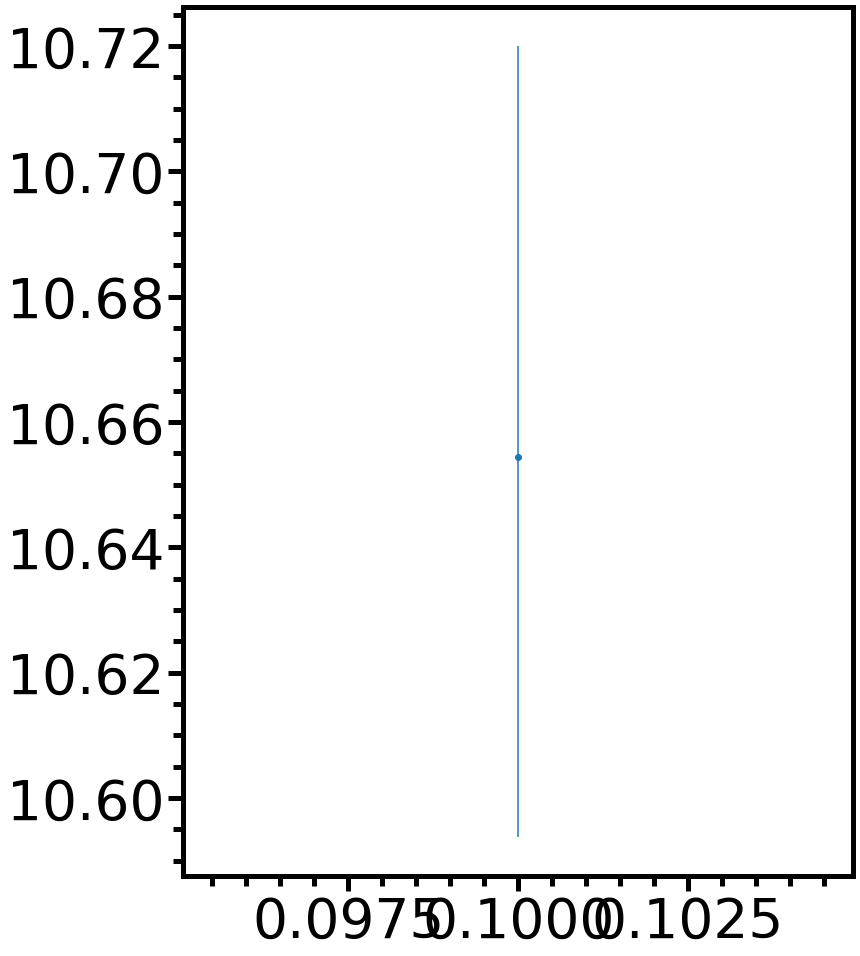

In [106]:
plt.scatter(0.1,10**np.mean(Re))

plt.errorbar(0.1, Re_ETGs, yerr=[[Re_ETGs_low],[Re_ETGs_up] ])